<h2 align="center"> Neighbourhood Analysis Chennai</h2>

This notebook is made as a part of Coursera's IBM Data Science Capstone. The main objective of the project is to analize the neighbourhoods in chennai and select the best Neighbourhood among them for a newly Hailing family to live in.

This notebook is made by Gopinath K S


___

## Introduction

Clustering the Neighbourhood of a city is important for both its inhabitants, and people who are intrested in that city. This Interest may be for any Reason ie, Business , Personel. Clustering of Neighbourhoods Allows one to identify the similar Neighbourhoods , find the pattern of distribution of Venues. In this note book , we will Cluster the Neighbourhoods of Chennai - one of the Largest and Active Metropolitan city in south India

Importing the nessesary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
! pip install geopy
from geopy.geocoders import Nominatim
import json
from pandas.io.json import json_normalize
import folium
from sklearn.cluster import KMeans
! pip install bs4
from bs4 import BeautifulSoup
! pip install lxml html5lib
import requests
import warnings
warnings.filterwarnings('ignore')



     |████████████████████████████████| 112kB 8.3MB/s eta 0:00:01
     |████████████████████████████████| 122kB 5.7MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
     |████████████████████████████████| 5.5MB 7.2MB/s eta 0:00:01     | 3.8MB 7.2MB/s eta 0:00:01


Scrapping the data of Areas of Chennai from a url

In [2]:
url="https://en.wikipedia.org/wiki/Areas_of_Chennai"
DF=pd.read_html(url)
df=DF[0]

These are the various neighbourhoods in chennai

In [3]:
df

,Location
0,Adambakkam
1,Adyar
2,Alandur
3,Alapakkam
4,Alwarpet
...,...
158,Villivakkam
159,Virugambakkam
160,Vyasarpadi
161,Washermanpet


Adding the location's lattitude and longitude to the Dataframe using Geopy Library

In [4]:
#just to create latitude and logitude columns by dummy values
df['latitude']=np.nan
df['longitude']=np.nan

In [5]:
for i,j in enumerate(df.Location):
    try :
        adress = str(j) + ",chennai,india"
        geolocator=Nominatim(user_agent="ny_explorer")
        location=geolocator.geocode(adress)
        lat=location.latitude
        long=location.longitude
        df.loc[i,'latitude']=lat
        df.loc[i,'longitude']=long
    except:
        pass


Removing the rows whose lattitude and longitude are not retrivable.

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df=df.reset_index(drop=True)
df

,Location,latitude,longitude
0,Adambakkam,12.982221,80.209121
1,Adyar,13.006450,80.257779
2,Alandur,13.004256,80.201453
3,Alapakkam,13.049901,80.165435
4,Alwarpet,13.033860,80.254549
...,...,...,...
131,Villivakkam,13.112588,80.208138
132,Virugambakkam,13.047543,80.192218
133,Vyasarpadi,13.116973,80.257124
134,Washermanpet,13.113630,80.281481


This will be the final dataset with which we gonna work through our project.

___

Let us visualize these nieghbouthoods in the map

In [8]:
#latitude and longitude values of chennai
lat_chennai=13.0307534
long_chennai=80.1200715
map_=folium.Map(location=[lat_chennai,long_chennai],zoom_start=12)

for lat,lng,label in zip(df['latitude'],df['longitude'],df['Location']):
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker([lat,lng],radius=5,popup=label,color='red',fill=True,fill_color='red',fill_opacity=0.7,parse_html=False).add_to(map_)
map_

Let us find the venues(Famous places) in each neighbourhood

### Foursquare Credentials

To find the location data of neighbourhoods, we will use Foursquare APIs, which is one of the largest Geospatial data Providers for free.

In [9]:
CLIENT_ID = 'DNJ5CRDMPIP3DXJKQT32P0XBOWEN1UKY2N3JDPPXLAMHBTZA'
CLIENT_SECRET = 'FCIHTQKT4L3EL4JMD4V4KEPSKN2KMVO1D5JNLW2FNTZDZK5R' 
VERSION = '20180605'
LIMIT = 100 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DNJ5CRDMPIP3DXJKQT32P0XBOWEN1UKY2N3JDPPXLAMHBTZA
CLIENT_SECRET:FCIHTQKT4L3EL4JMD4V4KEPSKN2KMVO1D5JNLW2FNTZDZK5R


In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
venues_chennai = getNearbyVenues(names=df['Location'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )

In [12]:
venues_chennai

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adambakkam,12.982221,80.209121,arun icecream,12.983447,80.207847,Dessert Shop
1,Adambakkam,12.982221,80.209121,Return Gifts Online,12.982387,80.208338,Gift Shop
2,Adambakkam,12.982221,80.209121,Sutherland,12.981002,80.205200,IT Services
3,Adambakkam,12.982221,80.209121,Bistro,12.983193,80.205020,Indian Restaurant
4,Adyar,13.006450,80.257779,Bombay Brassiere,13.006961,80.256419,North Indian Restaurant
...,...,...,...,...,...,...,...
842,West Mambalam,13.042732,80.227078,Anybody Can Smash,13.043116,80.228776,Badminton Court
843,West Mambalam,13.042732,80.227078,G.R. Thanga Maligai Jewellers,13.043249,80.228512,Jewelry Store
844,West Mambalam,13.042732,80.227078,Taz Kamar Executive Inn,13.039357,80.229466,Resort
845,West Mambalam,13.042732,80.227078,Manjal,13.045031,80.225209,Andhra Restaurant


The Top venues in chennai are -

In [13]:
venues_chennai['Venue Category'].value_counts().head(10)

Indian Restaurant       119
Café                     36
Fast Food Restaurant     33
Pizza Place              29
Hotel                    27
ATM                      22
Ice Cream Shop           21
Coffee Shop              21
Bakery                   20
Juice Bar                19
Name: Venue Category, dtype: int64

Indian restaurants top the popular venues in chennai.

Encoding the data to numerical values 

In [14]:
chennai_encoded=pd.get_dummies(venues_chennai[['Venue Category']],prefix="",prefix_sep="")
chennai_encoded['Neighbourhood']=venues_chennai['Neighbourhood']

list=['Neighbourhood']
for i in chennai_encoded.columns.values:
    list.append(i)
chennai_encoded=chennai_encoded[list[:-1]]
chennai_encoded

,Neighbourhood,ATM,African Restaurant,Airport,Airport Lounge,Andhra Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,...,Theater,Theme Park,Toy / Game Store,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Store,Whisky Bar,Women's Store
0,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,West Mambalam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,West Mambalam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,West Mambalam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,West Mambalam,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
chennai_grouped=chennai_encoded.groupby('Neighbourhood').mean()
chennai_grouped

,ATM,African Restaurant,Airport,Airport Lounge,Andhra Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Theater,Theme Park,Toy / Game Store,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Store,Whisky Bar,Women's Store
Neighbourhood,,,,,,,,,,,,,,,,,,,,,
Adambakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Adyar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0
Alandur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Alapakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Alwarpet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Velachery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Villivakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.5,0.0,0.000000,0.0,0.0,0.0
Virugambakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


Getting top venues of each Neighbourhood

In [16]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = chennai_grouped.index.values

for ind in np.arange(chennai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chennai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,Indian Restaurant,Dessert Shop,IT Services,Gift Shop,Fish Market,Food Stand,Food Service,Food Court,Food,Flower Shop
1,Adyar,Indian Restaurant,Electronics Store,North Indian Restaurant,Bakery,Fast Food Restaurant,Movie Theater,Coffee Shop,Café,Rock Club,Shoe Store
2,Alandur,Indian Restaurant,Breakfast Spot,Pizza Place,Diner,Flower Shop,Food Truck,Food Stand,Dessert Shop,Food Service,Food Court
3,Alapakkam,Fast Food Restaurant,Indian Restaurant,Snack Place,Flea Market,Food Truck,Food Stand,Food Service,Food Court,Food,Flower Shop
4,Alwarpet,Restaurant,Japanese Restaurant,Bakery,Indian Restaurant,North Indian Restaurant,Coffee Shop,Chinese Restaurant,Café,Sandwich Place,Men's Store


let us cluster the neighbourhoods

___

## Clustering

### Using K means clustering

In [17]:
k=4
model=KMeans(n_clusters=k, random_state=0)
model.fit(chennai_grouped)

model.labels_


array([1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 3, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 3, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 3, 0, 2, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 3, 3, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 3, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 3, 2, 0, 1, 0, 0, 0, 3, 0, 0, 3, 1,
       1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 2, 3, 1, 0, 1, 3, 0, 1, 3,
       0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

In [18]:
df=pd.merge(df,pd.DataFrame(chennai_grouped.index.values,columns=['Location']),how='inner')
df['label']=model.labels_
neighborhoods_venues_sorted['label']=model.labels_

Visualizing the Clustered Neighbourhoods

In [19]:
map_clustered = folium.Map(location=[lat_chennai, long_chennai], zoom_start=12)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['latitude'], df['longitude'],df['Location'], df['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clustered)
       
map_clustered 



Let us list down the Neighbourhoods of every Clusters which are similar to one another.

Cluster  1 


The top venues in Cluster 1 are

In [20]:
label_0=neighborhoods_venues_sorted[neighborhoods_venues_sorted['label']==0]
label_0.drop('Neighbourhood',axis=1,inplace=True)
d={}
for i in label_0.columns:
    for j in label_0.index:
        val=label_0.loc[j,i]
        if val not in d.keys():
            d[val]=1
        else:
            d[val]+=1
del d[0]
label_0_top=pd.Series(d,index=d.keys())
pie_0=label_0_top.sort_values(ascending=False).head(10)
pie_0

Food Court              44
Food Service            43
Food                    37
Food Stand              34
Flower Shop             31
Fast Food Restaurant    23
Fish Market             20
Flea Market             20
Women's Store           18
Café                    17
dtype: int64

Visualizing Cluster 1 Venues

Text(0.5, 1.0, 'Bar Graph')

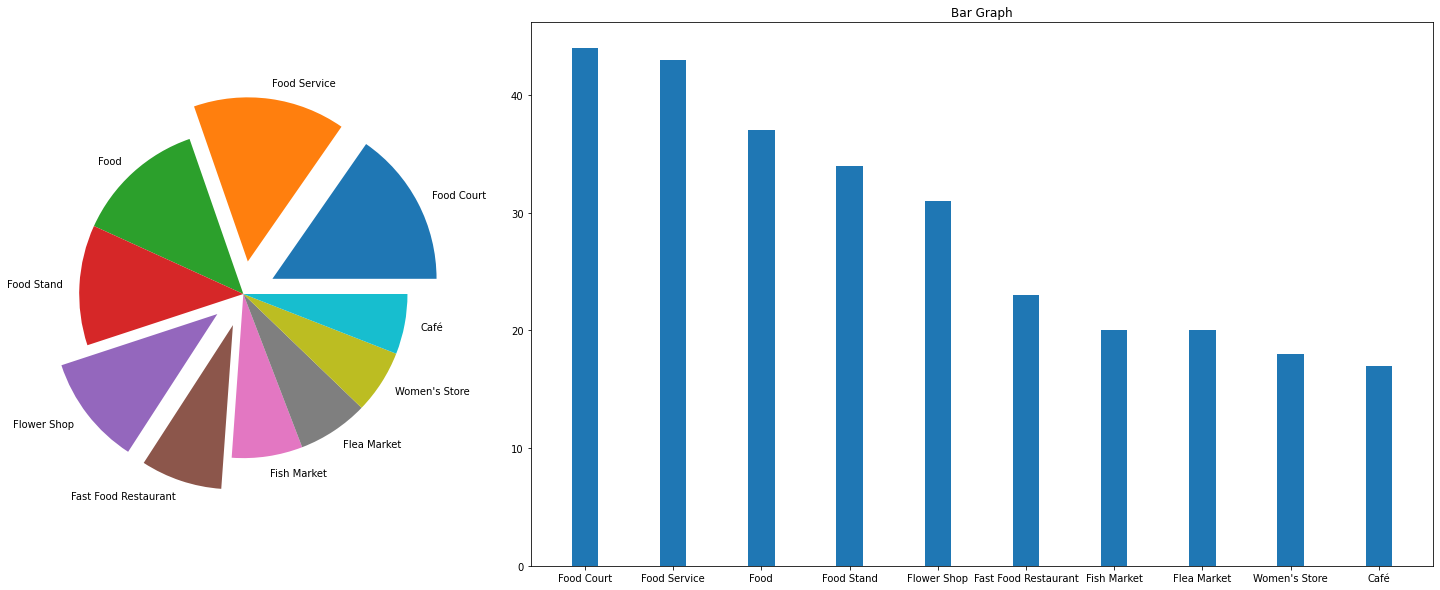

In [21]:
fig=plt.figure(figsize=(25,10))

ax0=fig.add_subplot(1,3,1)
plt.pie(np.array(pie_0),labels=pie_0.index,explode=[0.2,0.2,0,0,0.2,0.2,0,0,0,0])

ax1=fig.add_subplot(1,3,(2,3))
plt.bar(pie_0.index,pie_0,width=0.3)
ax1.set_title('Bar Graph')


Cluster 2

Top venues in Cluster 2 are :

In [22]:
label_1=neighborhoods_venues_sorted[neighborhoods_venues_sorted['label']==1]
label_1.drop('Neighbourhood',axis=1,inplace=True)
d={}
for i in label_1.columns:
    for j in label_1.index:
        val=label_1.loc[j,i]
        if val not in d.keys():
            d[val]=1
        else:
            d[val]+=1
del d[1]
label_1_top=pd.Series(d,index=d.keys())
pie_1=label_1_top.sort_values(ascending=False).head(10)
pie_1

Indian Restaurant       41
Food Court              25
Food Service            25
Food                    24
Food Stand              19
Flower Shop             19
Flea Market             17
Food Truck              13
Café                    13
Fast Food Restaurant    12
dtype: int64

Visualizing Cluster 2 Venues

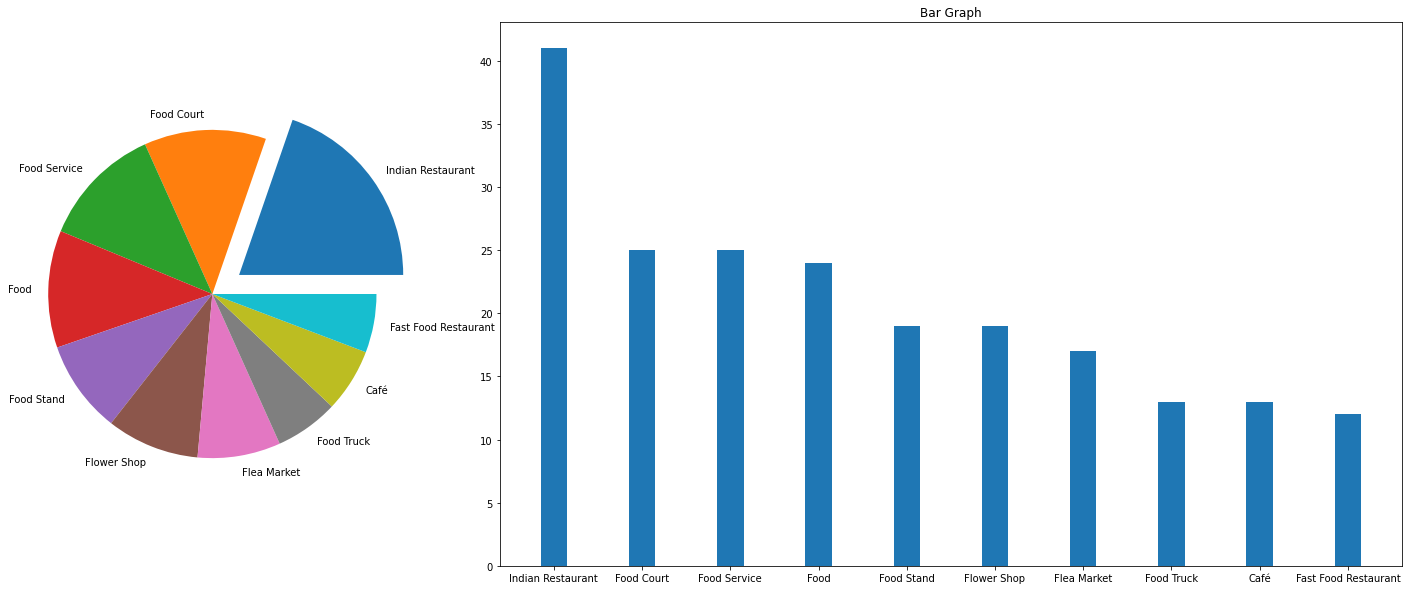

In [23]:
fig=plt.figure(figsize=(25,10))

ax0=fig.add_subplot(1,3,1)
plt.pie(np.array(pie_1),labels=pie_1.index,explode=[0.2,0,0,0,0,0,0,0,0,0])

ax1=fig.add_subplot(1,3,(2,3))
plt.bar(pie_1.index,pie_1,width=0.3)
ax1.set_title('Bar Graph')


plt.show()

Cluster 3

The top venues in Cluster 3 are

In [24]:
label_2=neighborhoods_venues_sorted[neighborhoods_venues_sorted['label']==2]
label_2.drop('Neighbourhood',axis=1,inplace=True)
d={}
for i in label_2.columns:
    for j in label_2.index:
        val=label_2.loc[j,i]
        if val not in d.keys():
            d[val]=1
        else:
            d[val]+=1
del d[2]
label_2_top=pd.Series(d,index=d.keys())
pie_2=label_2_top.sort_values(ascending=False).head(10)
pie_2

Food              9
Food Court        8
Ice Cream Shop    7
Food Service      7
Food Stand        7
Fish Market       6
Flower Shop       6
Food Truck        6
Flea Market       6
Juice Bar         4
dtype: int64

Visualizing Cluster 3 Venues

Text(0.5, 1.0, 'Bar Graph')

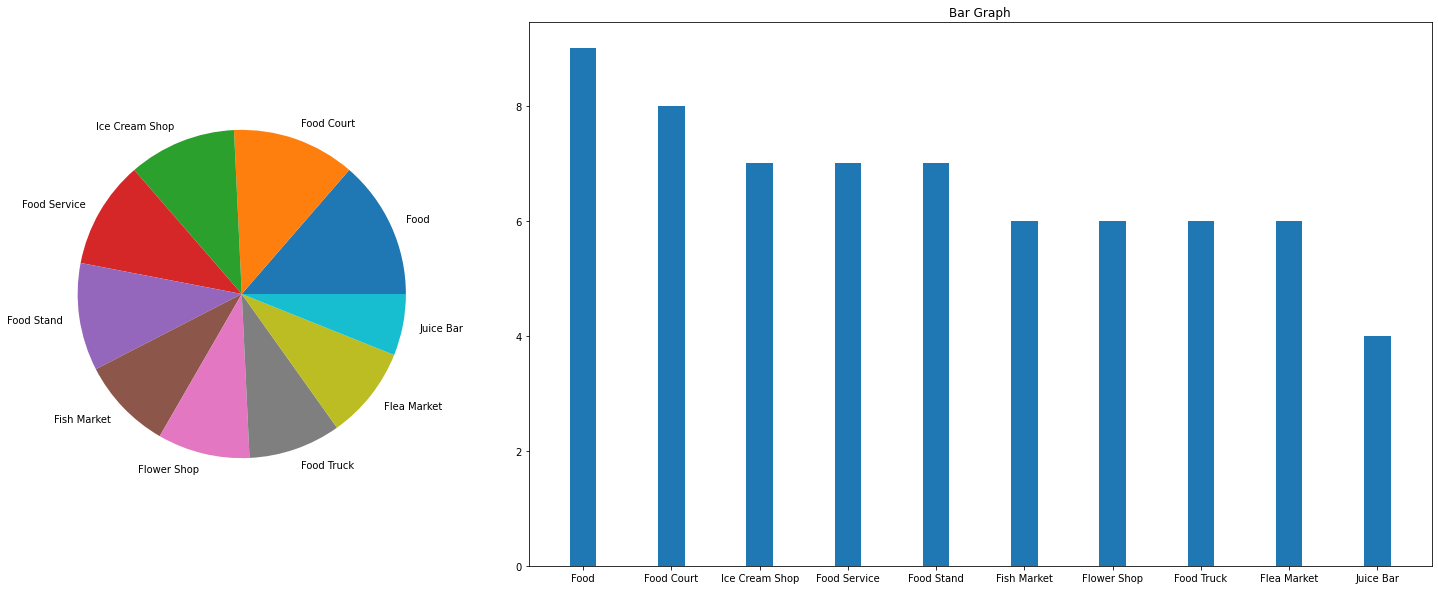

In [25]:
fig=plt.figure(figsize=(25,10))

ax0=fig.add_subplot(1,3,1)
plt.pie(np.array(pie_2),labels=pie_2.index)

ax1=fig.add_subplot(1,3,(2,3))
plt.bar(pie_2.index,pie_2,width=0.3)
ax1.set_title('Bar Graph')





Cluster 4

The top venues in Cluster 4 are

In [26]:
label_3=neighborhoods_venues_sorted[neighborhoods_venues_sorted['label']==3]
label_3.drop('Neighbourhood',axis=1,inplace=True)
d={}
for i in label_3.columns:
    for j in label_3.index:
        val=label_3.loc[j,i]
        if val not in d.keys():
            d[val]=1
        else:
            d[val]+=1
del d[3]
label_3_top=pd.Series(d,index=d.keys())
pie_3=label_3_top.sort_values(ascending=False).head(10)
pie_3

Food Stand              12
Food Service            12
Food                    12
Food Court              12
Flower Shop             12
Flea Market             11
Fish Market             10
Food Truck               7
Fast Food Restaurant     7
Women's Store            6
dtype: int64

Visualizing Cluster 4 Venues

Text(0.5, 1.0, 'Bar Graph')

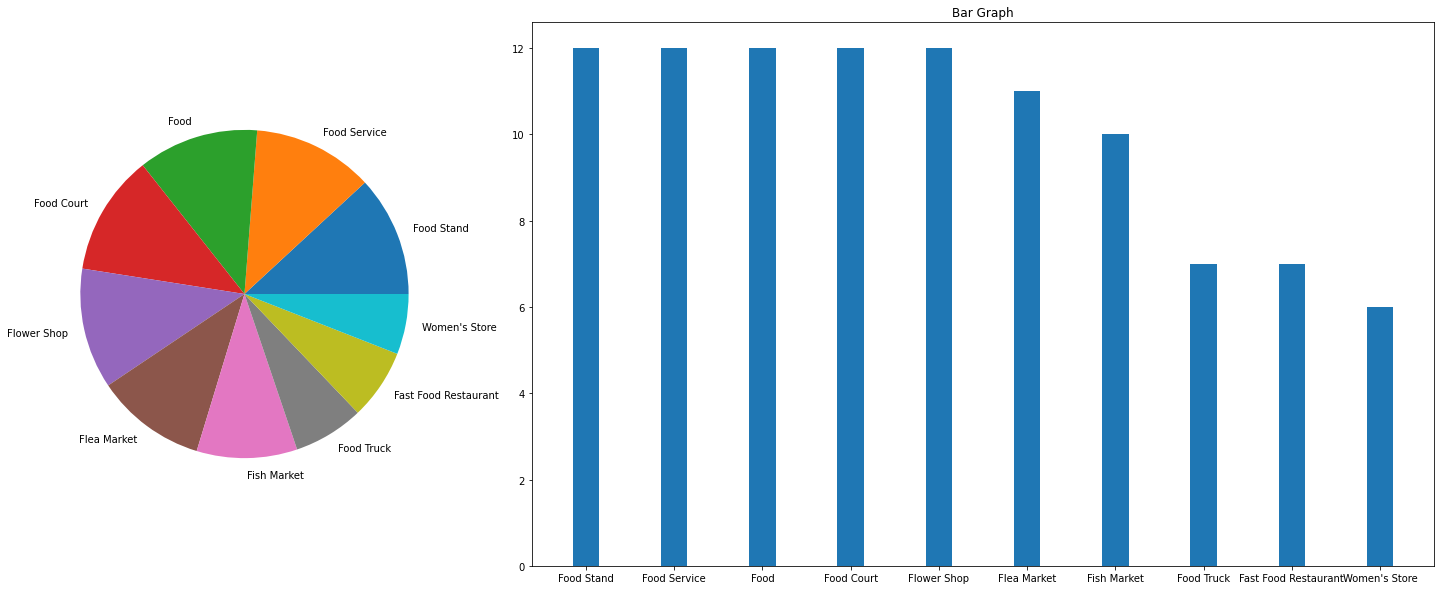

In [27]:
fig=plt.figure(figsize=(25,10))

ax0=fig.add_subplot(1,3,1)
plt.pie(np.array(pie_3),labels=pie_3.index)

ax1=fig.add_subplot(1,3,(2,3))
plt.bar(pie_3.index,pie_3,width=0.3)
ax1.set_title('Bar Graph')




Among the four Clusters, Cluster 3 seems to have equal distribution of all kinds of venues around.
Let us examine the cluster further.

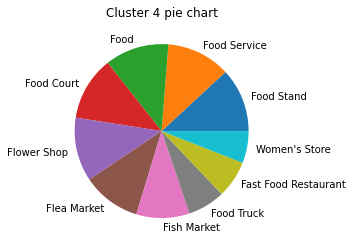

In [40]:
plt.pie(np.array(pie_3),labels=pie_3.index)
plt.title('Cluster 4 pie chart')
plt.show()

In [34]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['label']==3]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,label
15,Chitlapakkam,Mobile Phone Shop,Breakfast Spot,Flea Market,Food Truck,Food Stand,Food Service,Food Court,Food,Flower Shop,Fish Market,3
28,ICF,Juice Bar,Women's Store,Fish Market,Food Truck,Food Stand,Food Service,Food Court,Food,Flower Shop,Flea Market,3
39,Korattur,Dessert Shop,Cupcake Shop,Fish Market,Food Truck,Food Stand,Food Service,Food Court,Food,Flower Shop,Flea Market,3
51,Madipakkam,Grocery Store,Women's Store,Frozen Yogurt Shop,Food Truck,Food Stand,Food Service,Food Court,Food,Flower Shop,Flea Market,3
52,Maduravoyal,Movie Theater,Women's Store,Fish Market,Food Stand,Food Service,Food Court,Food,Flower Shop,Flea Market,Fast Food Restaurant,3
63,Mudichur,Pizza Place,Fast Food Restaurant,Food Stand,Food Service,Food Court,Food,Flower Shop,Flea Market,Fish Market,Farmers Market,3
76,Pallikaranai,Women's Store,Fish Market,Food Truck,Food Stand,Food Service,Food Court,Food,Flower Shop,Flea Market,Fast Food Restaurant,3
83,Peerkankaranai,Food Stand,Women's Store,Fish Market,Food Truck,Food Service,Food Court,Food,Flower Shop,Flea Market,Fast Food Restaurant,3
86,Perungalathur,Pizza Place,Fast Food Restaurant,Food Stand,Food Service,Food Court,Food,Flower Shop,Flea Market,Fish Market,Farmers Market,3
102,Sithalapakkam,Fast Food Restaurant,Pharmacy,Women's Store,Food Stand,Food Service,Food Court,Food,Flower Shop,Flea Market,Fish Market,3


So , These are the best Neighbourhoods in Chennai

In [37]:
selected=neighborhoods_venues_sorted[neighborhoods_venues_sorted['label']==3][['Neighbourhood']]

Let us a

In [38]:
pop_df=pd.read_csv('chennai_population.csv',names=['Neighbourhood','type','Population'])
pop_df

,Neighbourhood,type,Population
0,Town,Type,Population
1,Adayalampattu,Out Growth,"1,874"
2,Alamathi,Census Town,"7,424"
3,Anakaputhur,Municipality,"48,050"
4,Ayappakkam,Census Town,"29,511"
...,...,...,...
87,Valasaravakkam,Municipality,"47,378"
88,Vanagaram,Census Town,"19,208"
89,Vandalur,Census Town,"16,852"
90,Varadarajapuram,Out Growth,"3,383"


In [39]:
pd.merge(pop_df,selected,on='Neighbourhood')

,Neighbourhood,type,Population
0,Chitlapakkam,Town Panchayat,"37,906"
1,Madipakkam,Census Town,"35,752"
2,Maduravoyal,Municipality,"86,195"
3,Pallikaranai,Town Panchayat,"43,493"
4,Peerkankaranai,Town Panchayat,"25,871"
5,Perungalathur,Town Panchayat,"37,342"


Maduravoyal is the only Municipality Neighbourhood in Chennai.
Maduravoyal will be the best Neighbourhood to live in Chennai.

 ____
 Thanks for Reading 